# Morphological Operations in Medical Image Preprocessing
## Objective
To demonstrate how morphological operations modify image structures based on shape
and how they are used to refine binary Region of Interest (ROI) masks.

This notebook focuses on understanding the behavior of morphological operations
as preprocessing tools, not on clinical diagnosis or automated decision-making.


In [2]:
#Import Required Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt


- `import cv2`  
  Imports OpenCV, which provides built-in functions for morphological operations.

- `import numpy as np`  
  Imports NumPy for array handling and creation of structuring elements.

- `import matplotlib.pyplot as plt`  
  Imports Matplotlib for visualizing intermediate and final results.


In [3]:
#Upload image
from google.colab import files
uploaded = files.upload()


Saving Chest X-Ray Images.jpeg to Chest X-Ray Images.jpeg


- `from google.colab import files`  
  Imports utilities for uploading files into the Colab environment.

- `uploaded = files.upload()`  
  Allows manual upload of a medical image that will be used for morphological processing.


(np.float64(-0.5), np.float64(2110.5), np.float64(1508.5), np.float64(-0.5))

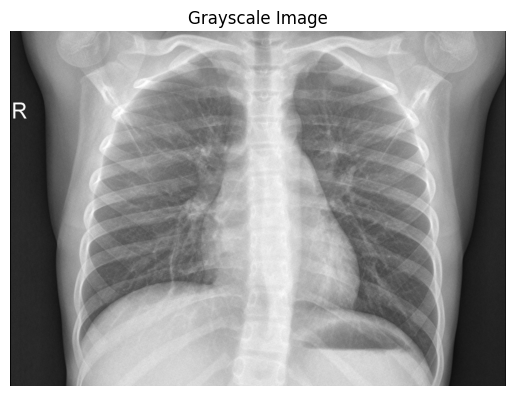

In [4]:
#Read Image and Convert to Grayscale
img = cv2.imread(list(uploaded.keys())[0])
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")


- `cv2.imread(...)`  
  Reads the uploaded image into memory.

- `cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)`  
  Converts the image to grayscale so that morphological operations can be applied
  on intensity-based data.

- `plt.imshow(gray, cmap='gray')`  
  Displays the grayscale image.

- `plt.title(...)`  
  Labels the displayed image.

- `plt.axis("off")`  
  Removes axis markings for clean visualization.


(np.float64(-0.5), np.float64(2110.5), np.float64(1508.5), np.float64(-0.5))

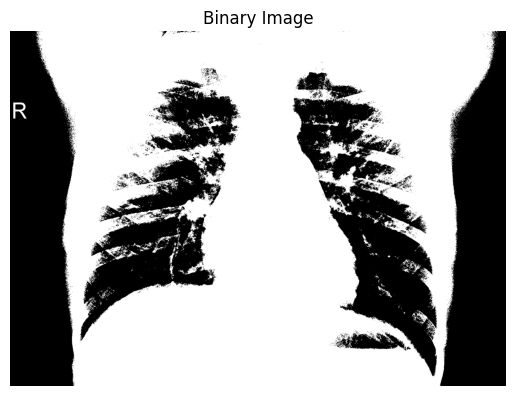

In [5]:
#Convert to Binary Image (Thresholding)
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(binary, cmap='gray')
plt.title("Binary Image")
plt.axis("off")


- `cv2.threshold(...)`  
  Converts the grayscale image into a binary image using a fixed threshold.

- `127`  
  Intensity threshold separating foreground and background.

- `255`  
  Pixel value assigned to foreground regions.

- Binary images are required for morphological operations,
  as these techniques operate on object shapes.


In [6]:
#Define Structuring Element
kernel = np.ones((5,5), np.uint8)


- `np.ones((5,5), np.uint8)`  
  Creates a 5×5 structuring element filled with ones.

- This structuring element defines the neighborhood
  over which morphological operations are applied.

- The size and shape of the kernel directly influence
  how object boundaries are modified.


(np.float64(-0.5), np.float64(2110.5), np.float64(1508.5), np.float64(-0.5))

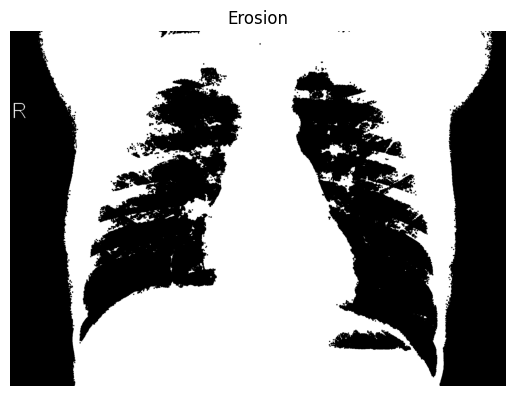

In [7]:
#Erosion
erosion = cv2.erode(binary, kernel, iterations=1)

plt.imshow(erosion, cmap='gray')
plt.title("Erosion")
plt.axis("off")


- `cv2.erode(...)`  
  Shrinks foreground regions by removing pixels at object boundaries.

- Erosion helps remove small isolated noise regions.

- `iterations=1`  
  Controls how aggressively erosion is applied.


(np.float64(-0.5), np.float64(2110.5), np.float64(1508.5), np.float64(-0.5))

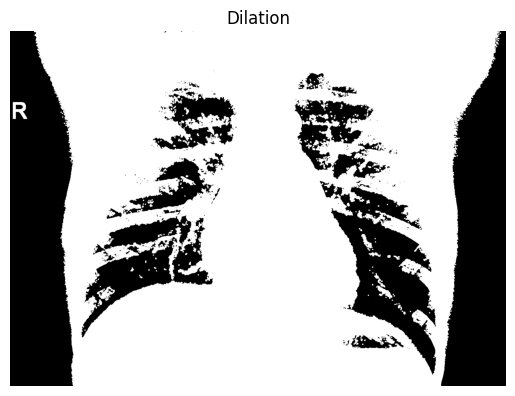

In [8]:
#Dilation
dilation = cv2.dilate(binary, kernel, iterations=1)

plt.imshow(dilation, cmap='gray')
plt.title("Dilation")
plt.axis("off")


- `cv2.dilate(...)`  
  Expands foreground regions by adding pixels to object boundaries.

- Dilation helps fill small gaps and connect broken structures.

- The same kernel ensures consistency in comparison with erosion.


(np.float64(-0.5), np.float64(2110.5), np.float64(1508.5), np.float64(-0.5))

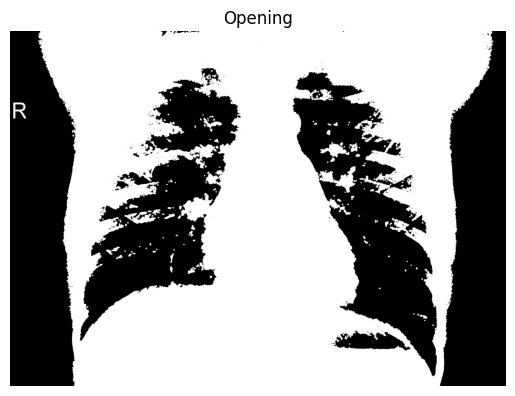

In [9]:
#Opening (Erosion followed by Dilation)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

plt.imshow(opening, cmap='gray')
plt.title("Opening")
plt.axis("off")


- `cv2.MORPH_OPEN`  
  Performs erosion followed by dilation.

- Opening removes small noise objects while preserving
  the overall shape of the main region.

- Commonly used to clean binary masks after thresholding.


(np.float64(-0.5), np.float64(2110.5), np.float64(1508.5), np.float64(-0.5))

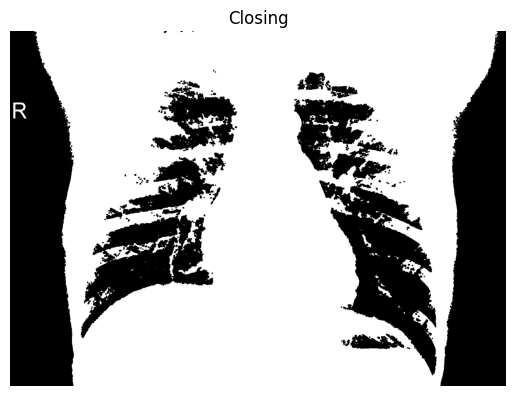

In [10]:
#Closing (Dilation followed by Erosion)
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

plt.imshow(closing, cmap='gray')
plt.title("Closing")
plt.axis("off")


- `cv2.MORPH_CLOSE`  
  Performs dilation followed by erosion.

- Closing fills small holes and gaps within the foreground object.

- Useful for creating solid and continuous ROI masks.


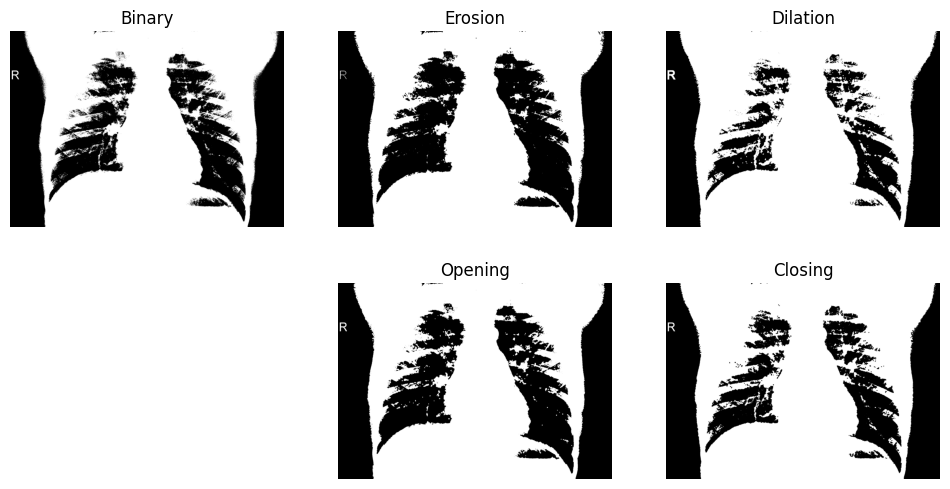

In [11]:
#Visual Comparison
plt.figure(figsize=(12,6))

plt.subplot(2,3,1)
plt.imshow(binary, cmap='gray')
plt.title("Binary")
plt.axis("off")

plt.subplot(2,3,2)
plt.imshow(erosion, cmap='gray')
plt.title("Erosion")
plt.axis("off")

plt.subplot(2,3,3)
plt.imshow(dilation, cmap='gray')
plt.title("Dilation")
plt.axis("off")

plt.subplot(2,3,5)
plt.imshow(opening, cmap='gray')
plt.title("Opening")
plt.axis("off")

plt.subplot(2,3,6)
plt.imshow(closing, cmap='gray')
plt.title("Closing")
plt.axis("off")

plt.show()


- Displays all morphological results side by side for comparison.
- Helps visually understand how each operation modifies object shape.
- Reinforces the conceptual difference between erosion, dilation,
  opening, and closing.


### Observations

- Erosion removes small noise regions but may shrink the main object.
- Dilation expands object boundaries and fills gaps.
- Opening removes small protrusions and smooths outer contours.
- Closing fills internal holes and connects broken regions.


### Limitations

- Morphological operations depend strongly on kernel size and shape.
- Overuse may distort anatomical structures.
- These methods refine ROI masks but do not perform segmentation by themselves.
- Clinical interpretation requires validation beyond preprocessing.
